# Market Segmentation

This project entails developing a customer segmentation model to give recommendations like saving plans, loans, wealth management etc on the target customers

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering,MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore") 

### Loading the Dataset

In [3]:
df = pd.read_csv('Customer Data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

### Exploratory Data Analysis

In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Replacing the null values with the mean

In [8]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS .fillna(df.MINIMUM_PAYMENTS .mean())
df.CREDIT_LIMIT = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

The dataset is now clean, with no null values

In [9]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

We will be using all the columns but the CUST_ID, so we drop it

In [11]:
df.drop(columns=['CUST_ID'], axis=1, inplace=True)


In [12]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

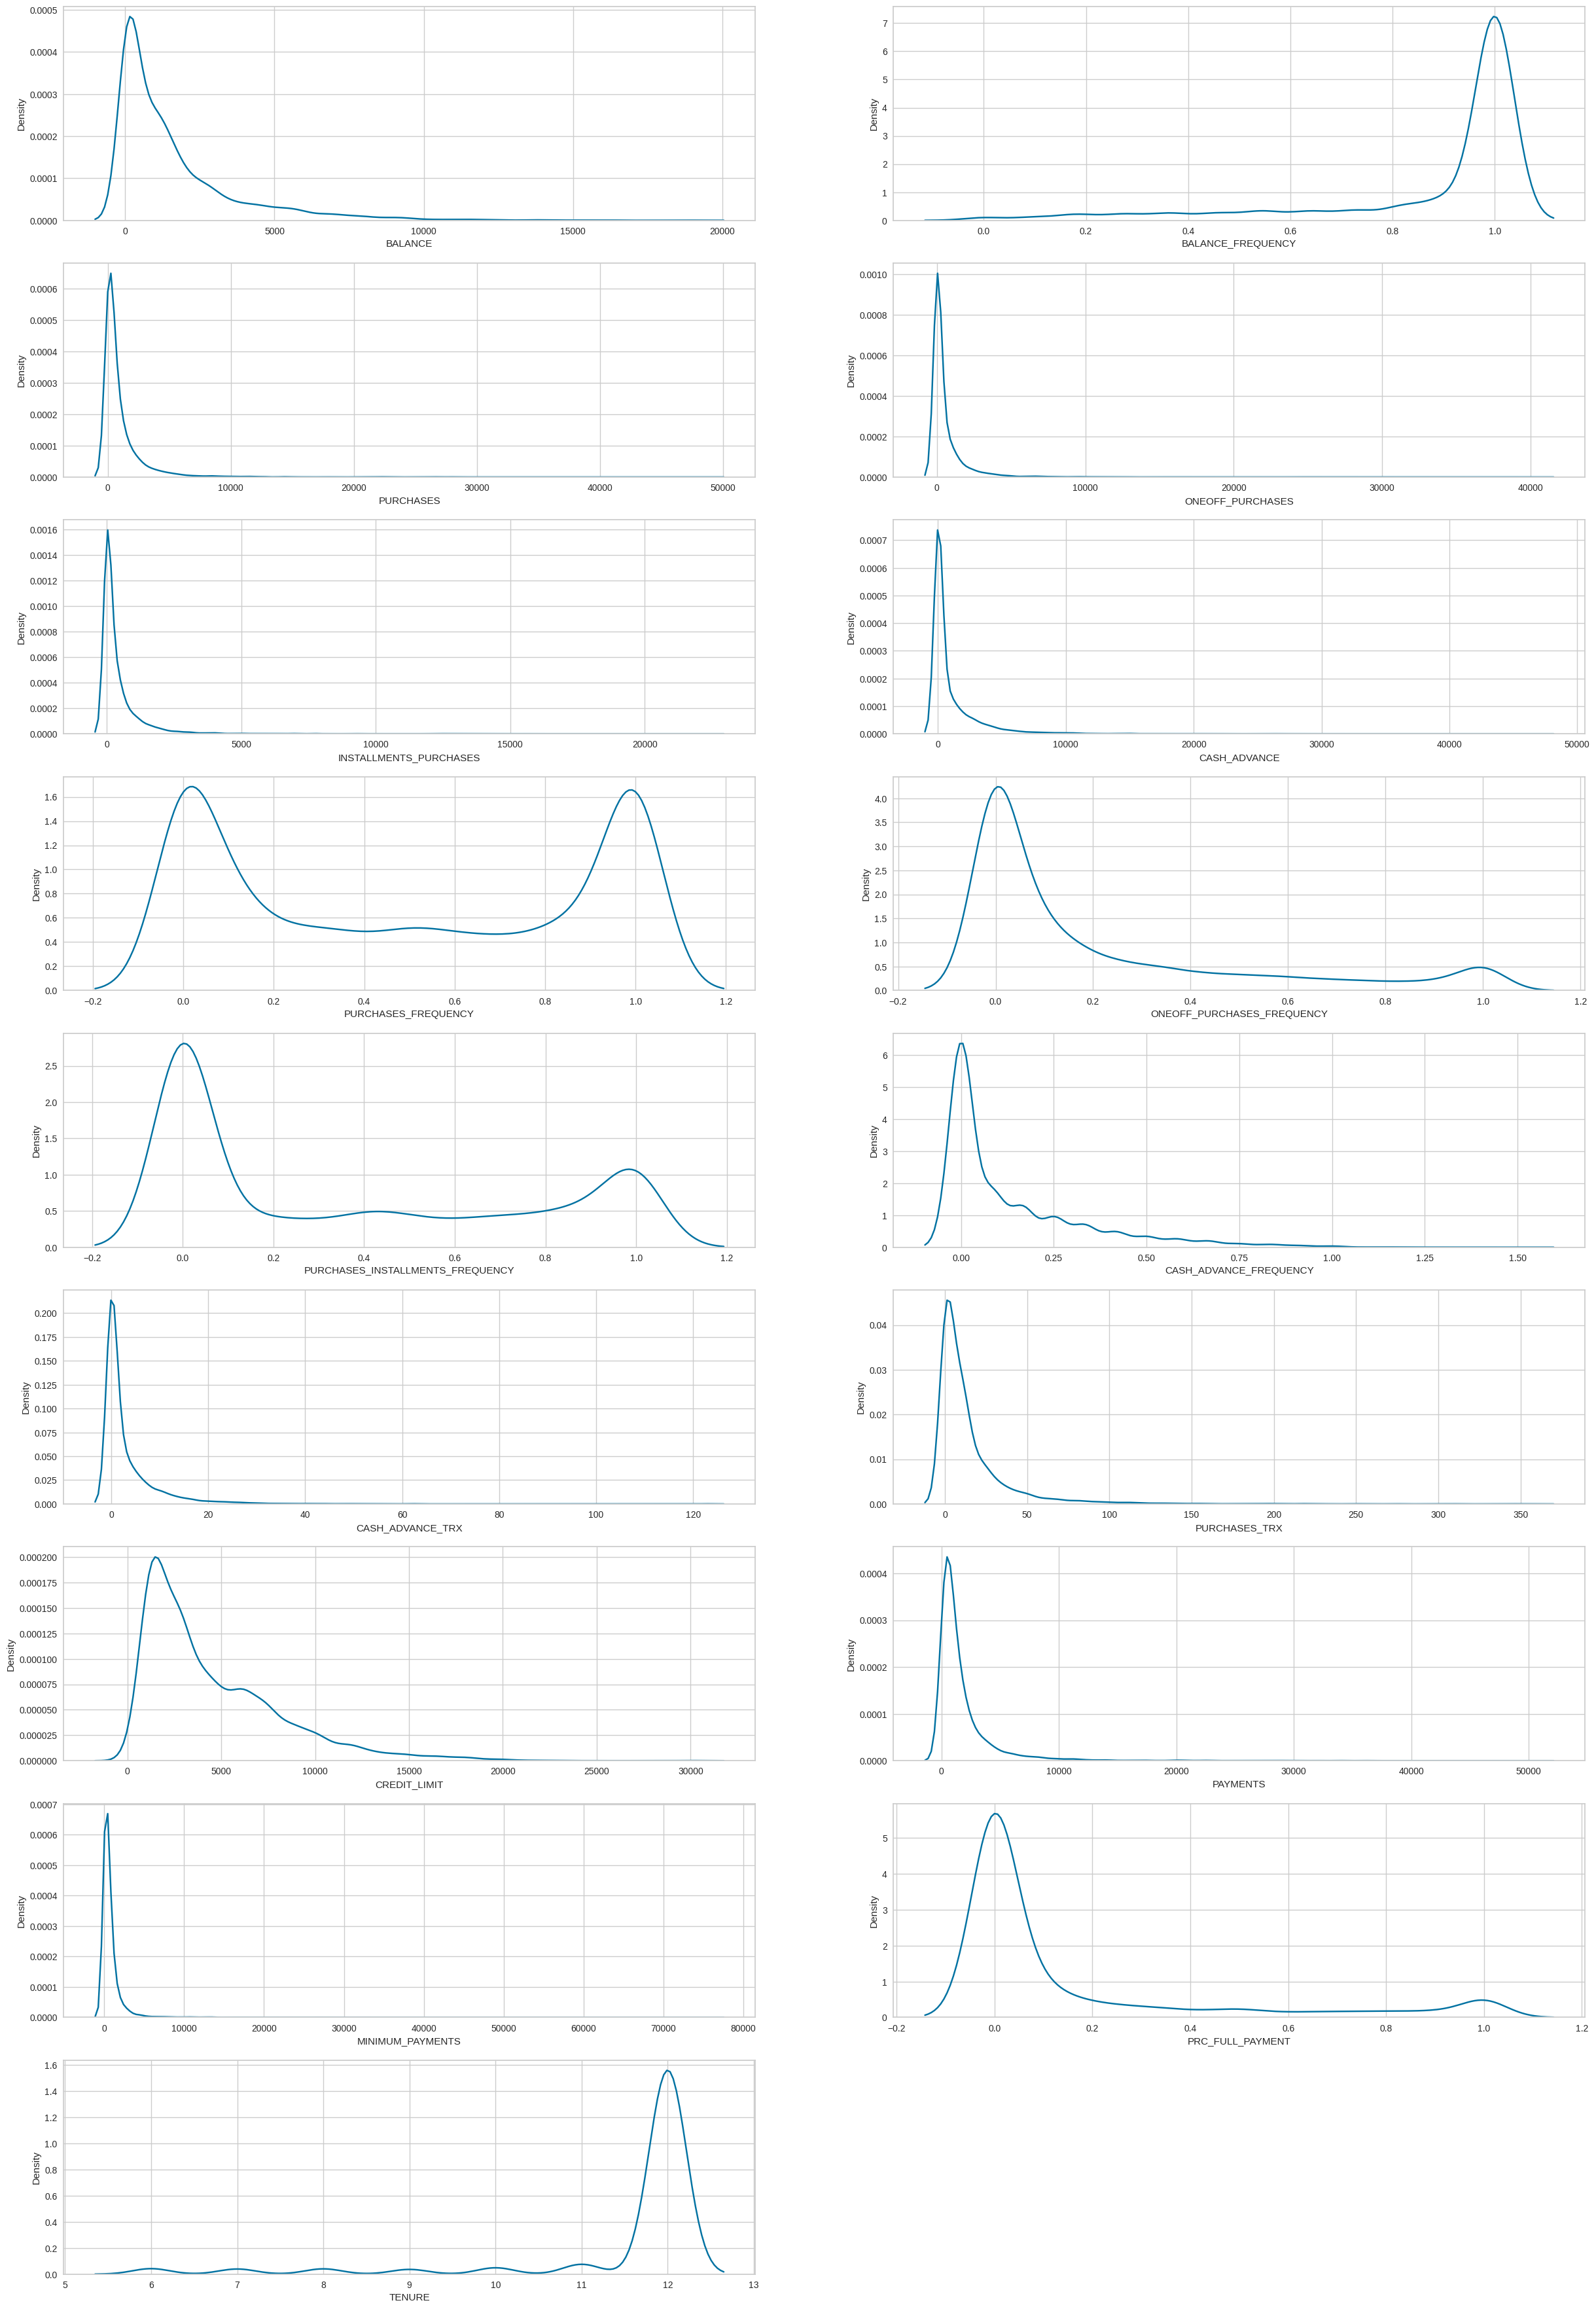

In [13]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype !='object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
plt.show()

Based on the kdeplots above, none of the variables are normally distributed. Most of them are skewed to the left, while some like  PURCHASES_FREQUENCY have two points of concentration. This means that the particular variable is multimodal. We will also use distplot to visualize the distributions of the variables

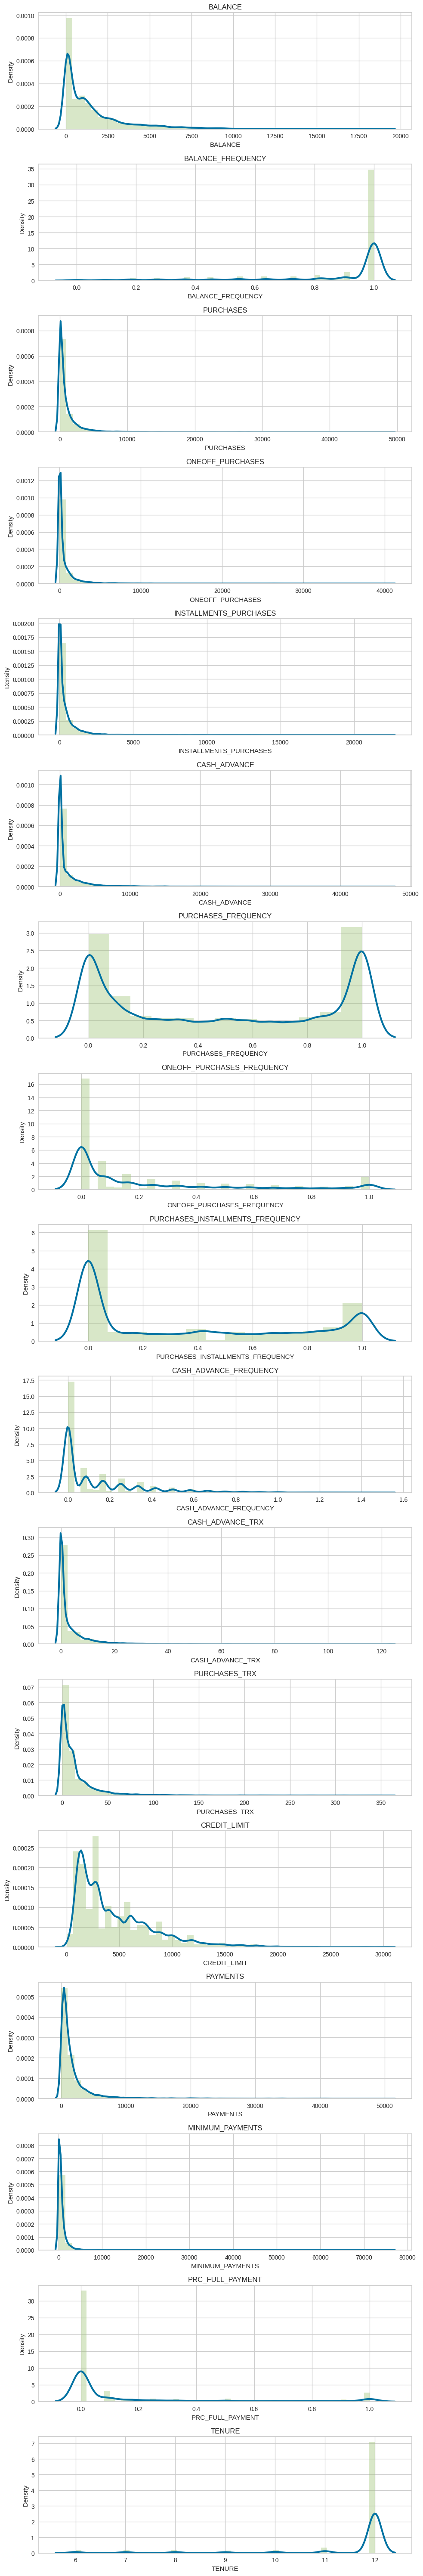

In [14]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={'color':'b', 'bw':0.1, 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

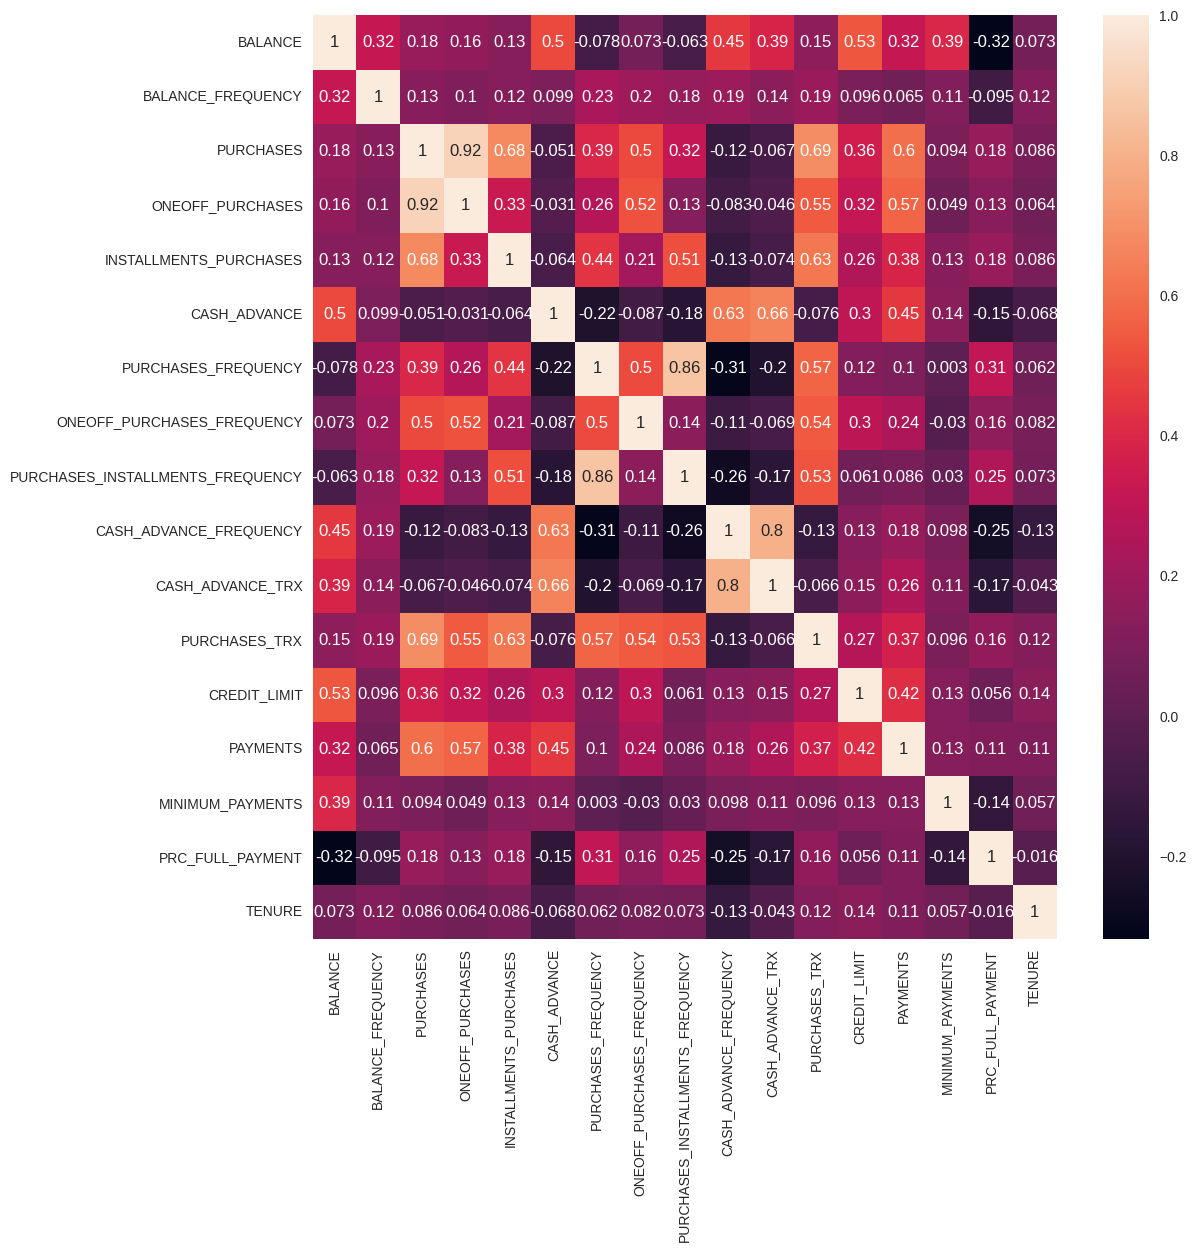

In [15]:
# Creating a correlation heatmap to show the correlation betwen variables
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

We will look at the type of relationship between variables by plotting scatterplots. We will use pairplots to save time

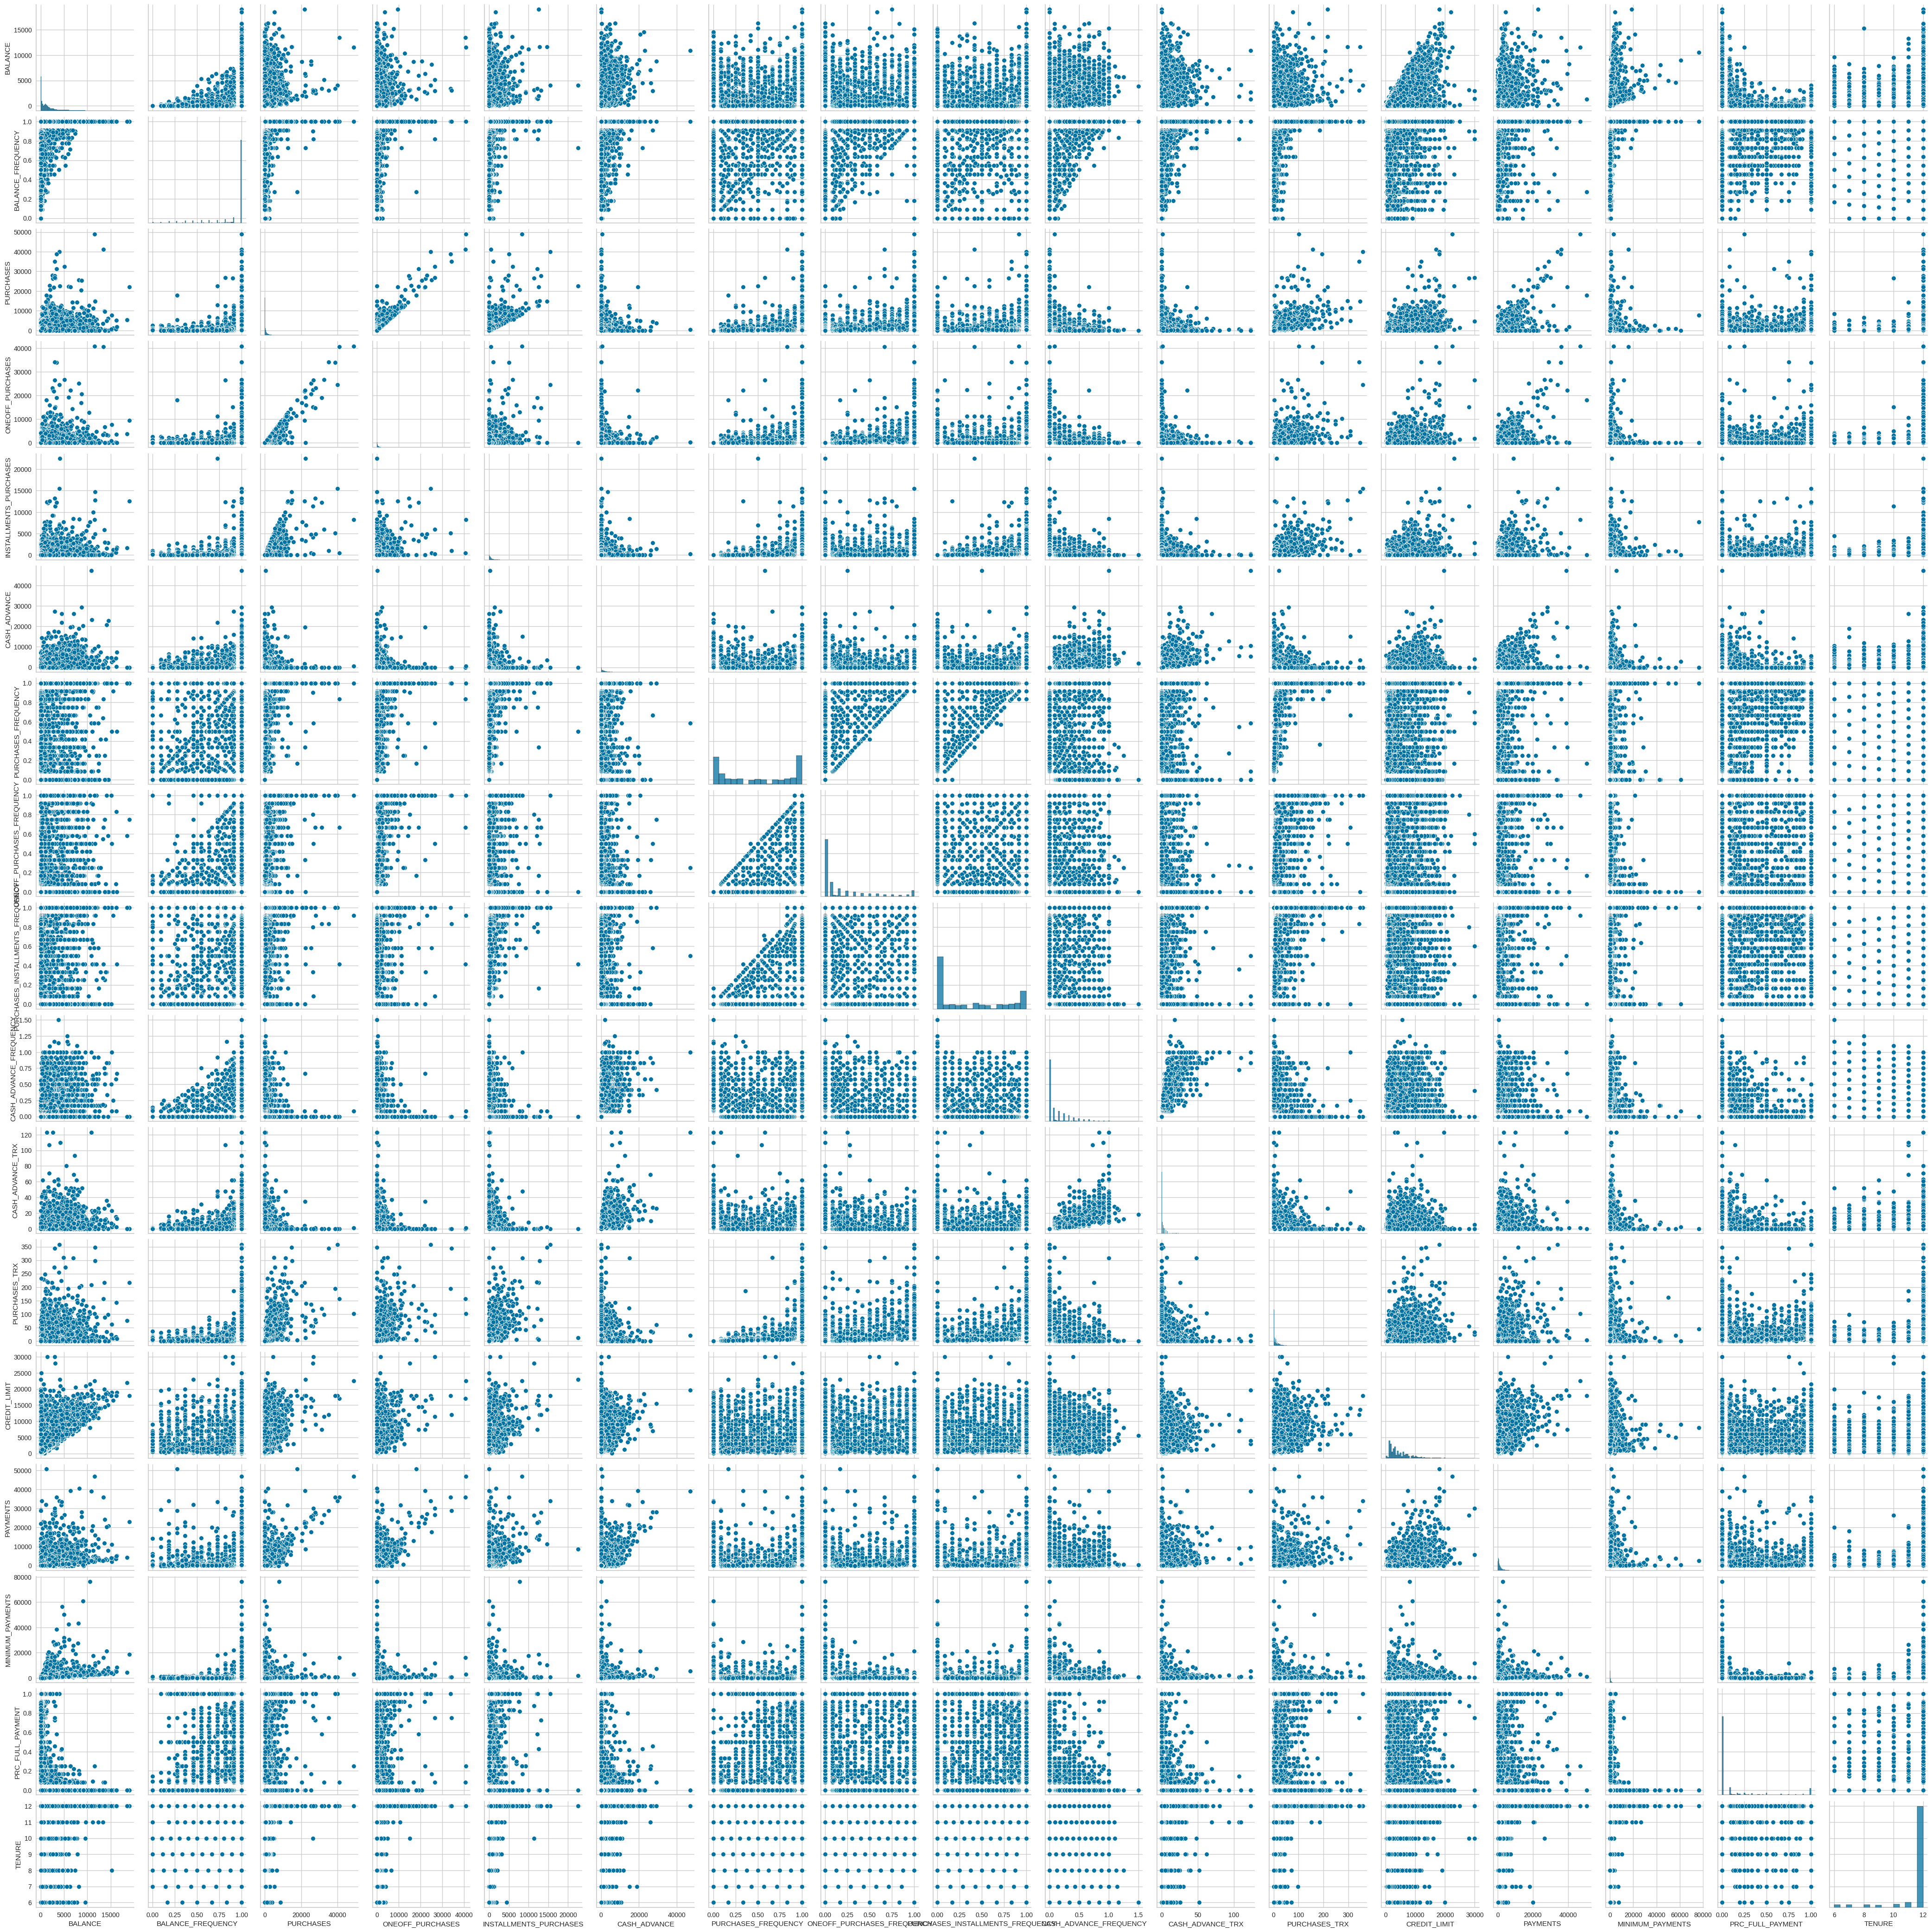

In [16]:
sns.pairplot(df)

Checking for outliers in the data. 

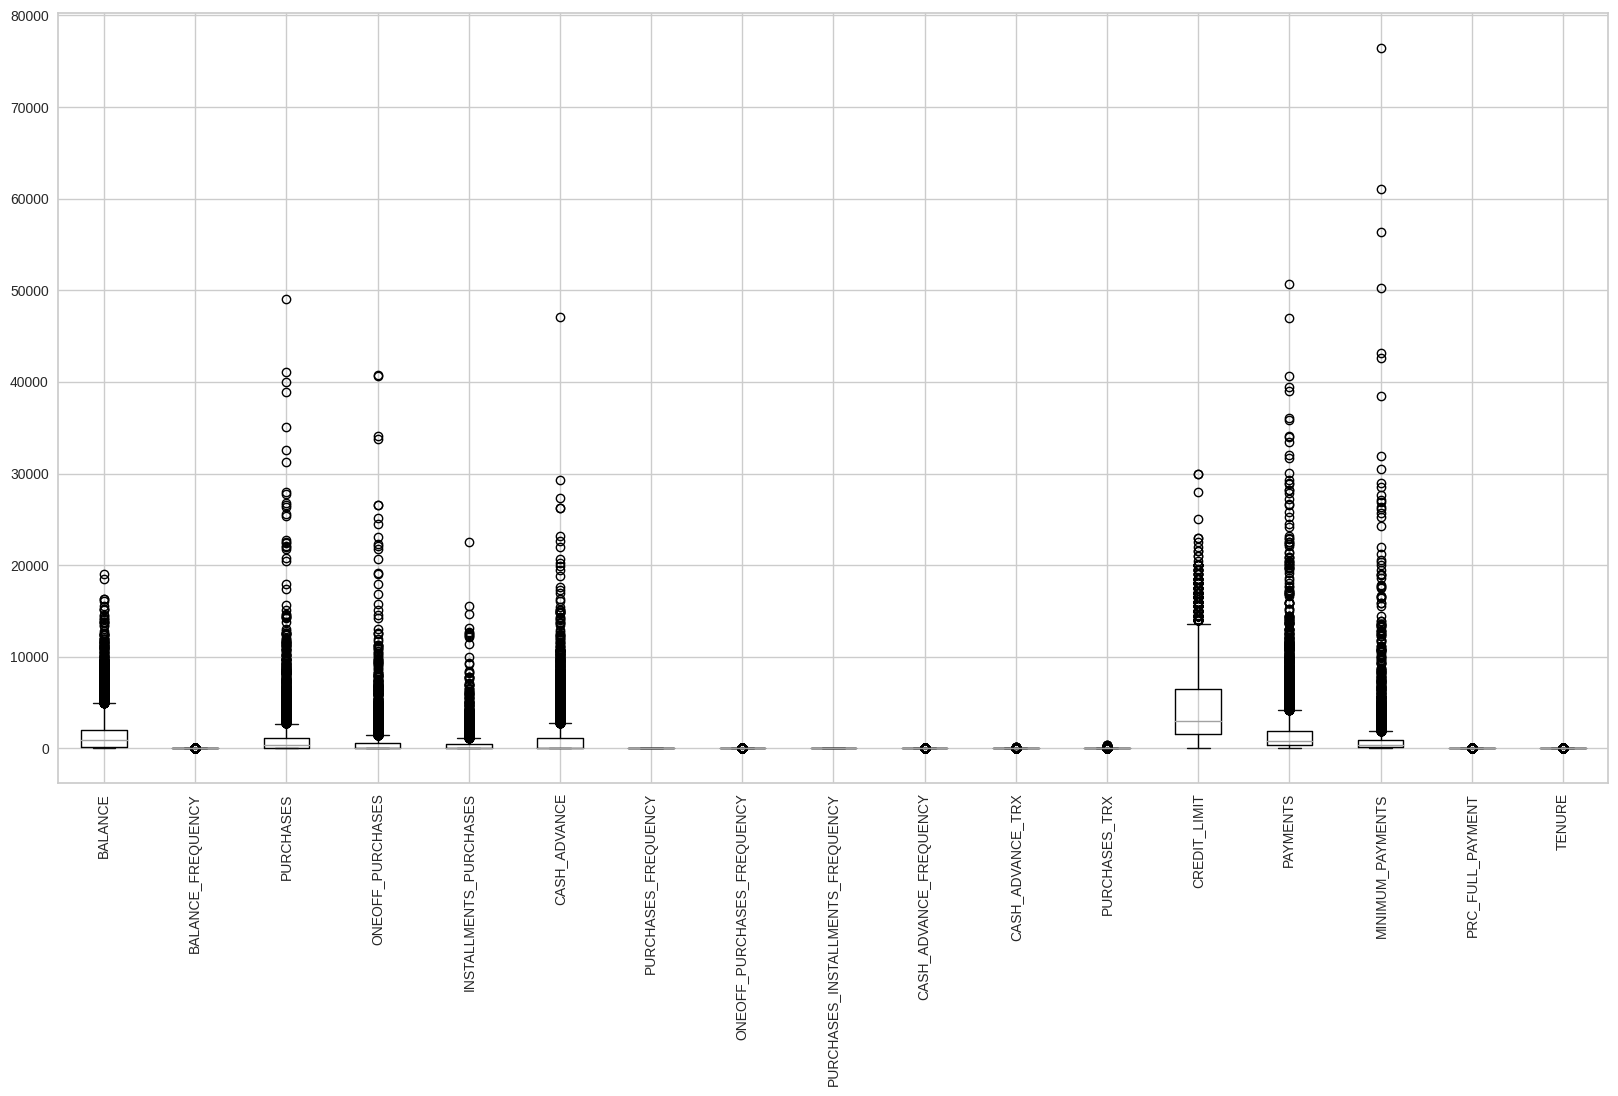

In [17]:
plt.figure(figsize=(20,10))
boxplot = df.boxplot()
plt.xticks(rotation=90) # Rotating the xlabels 90 degrees
plt.show()

The column MINIMUM_PAYMENTS has outliers, so we will have to do away with them

In [18]:
outliers = df.loc[df['MINIMUM_PAYMENTS'] > 50000]
df.drop(outliers.index, inplace=True)

In [19]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

We now have 8946 rows, but the indexes have been maintained. let us adjust the indexes

In [20]:
df = df.reset_index()


In [22]:
df.drop(columns=['index'], inplace=True)

### Data PreProcessing

#### Scaling the DataFrame

In [23]:
# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Fitting and transforming using the scaler
scaled_df = scaler.fit_transform(df)

# Deriving a new dataframe from the scaled data 
new_df = pd.DataFrame(scaled_df, columns=df.columns)

new_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.087521           0.636364   0.030567          0.036775   
4     0.042940           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8941  0.001496           1.000000   0.005936          0.000000   
8942  0.001007           1.000000   0.006118          0.000000   
8943  0.001229           0.833333   0.002945          0.000000   
8944  0.000707           0.833333   0.000000          0.000000   
8945  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.004366             0.083333   
4                   0.000000      0.000000             0.083333   
...                      ...           ...                  ...   
8941                0.012939      0.000000             1.000000   
8942                0.013333      0.000000             1.000000   
8943                0.006418      0.000000             0.833333   
8944                0.000000      0.000776             0.000000   
8945                0.000000      0.002695             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8941                    0.000000                          0.833333   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.666667   
8944                    0.000000                          0.000000   
8945                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000           0.00000       0.005587      0.031720   
1                   0.166667           0.03252       0.000000      0.232053   
2                   0.000000           0.00000       0.033520      0.248748   
3                   0.055555           0.00813       0.002793      0.248748   
4                   0.000000           0.00000       0.002793      0.038397   
...                      ...               ...            ...           ...   
8941                0.000000           0.00000       0.016760      0.031720   
8942                0.000000           0.00000       0.016760      0.031720   
8943                0.000000           0.00000       0.013966      0.031720   
8944                0.111111           0.01626       0.000000      0.015025   
8945                0.222222           0.01626       0.064246      0.038397   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.003979          0.003234          0.000000     1.0  
1     0.080893          0.024861          0.222222     1.0  
2     0.012264          0.014543          0.000000     1.0  
3     0.000000          0.020036          0.000000     1.0  
4     0.013374          0.005675          0.000000     1.0  
...        ...               ...               ...     ...  
8941  0.006419          0.001133          0.500000     0.0  
8942  0.005439          0.020036          0.000000     0.0  
8943  0.001602          0.001910          0.250000     0.0  
8944  0.0

### Dimensionality Reduction

We will flatten the dataframe for visualziation

In [24]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(new_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0    -0.482031 -0.097385
1    -0.608392 -0.019740
2     0.304966  0.920570
3    -0.588458 -0.005735
4    -0.554181  0.053533
...        ...       ...
8941  0.647059 -0.464999
8942  0.549878 -0.405646
8943  0.360491 -0.423806
8944 -0.645848 -0.206401
8945 -0.094208  0.397843

[8946 rows x 2 columns]

## Clustering

### 1. KMeans Clustering

In KMeans clustering, we first have to figure out the initial number of clusters. We will use the Elbow method and the Silhouette method

##### Elbow method

In this method, wew plot the relationship between the number of clusters and the Within Cluster Sum of Squares (WCSS), and pick the value where the graph forms an elbow as the optimal number of cluster (K)

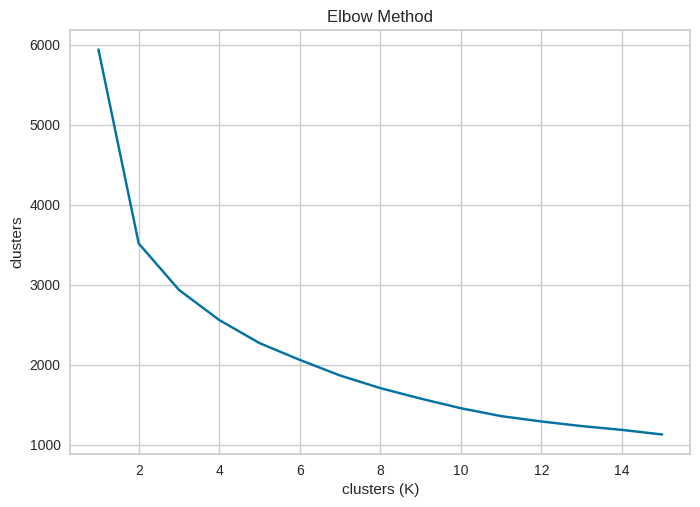

In [25]:
# Initializing an empty list to store the WCSS
wcss = []

# Fitting the KMeans clustering to values from 1 to 15
range_val = range(1, 16)

# Looping through the values
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(new_df))
    wcss.append(kmean.inertia_)
    
# plotting the graph
plt.plot(range_val, wcss, 'bx-')
plt.xlabel('clusters (K)')
plt.ylabel('clusters')
plt.title('Elbow Method')
plt.show()

From our graph, the optimal number of clusters is 2. Let us now try the Solhouette algorithm

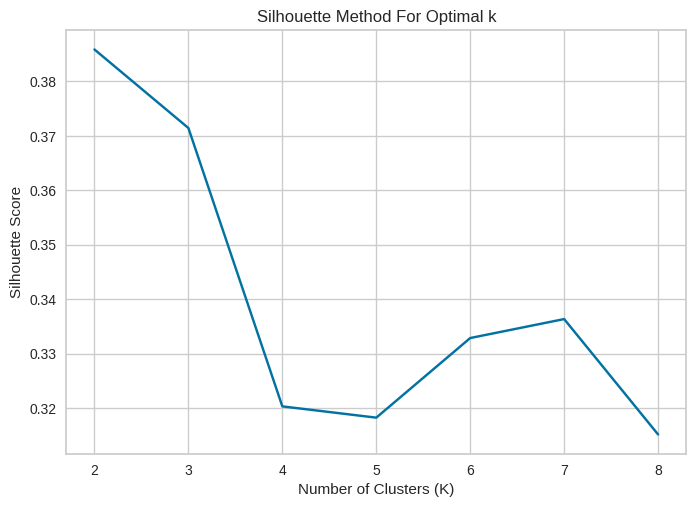

In [26]:
cluster_range = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = [] # rename the list to silhouette_scores

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [27]:
# Creating the model 
kmeans_model = KMeans(2)

# Fitting the model to our dataset
kmeans_model.fit_predict(new_df)

# Creating a clustered dataframe 
new_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)
new_df_kmeans

PCA1      PCA2  cluster
0    -0.482031 -0.097385        0
1    -0.608392 -0.019740        0
2     0.304966  0.920570        1
3    -0.588458 -0.005735        0
4    -0.554181  0.053533        0
...        ...       ...      ...
8941  0.647059 -0.464999        1
8942  0.549878 -0.405646        1
8943  0.360491 -0.423806        1
8944 -0.645848 -0.206401        0
8945 -0.094208  0.397843        0

[8946 rows x 3 columns]

We now visualize the clustered dataframe

Text(0.5, 1.0, 'Clustered algorithm using KMeans')

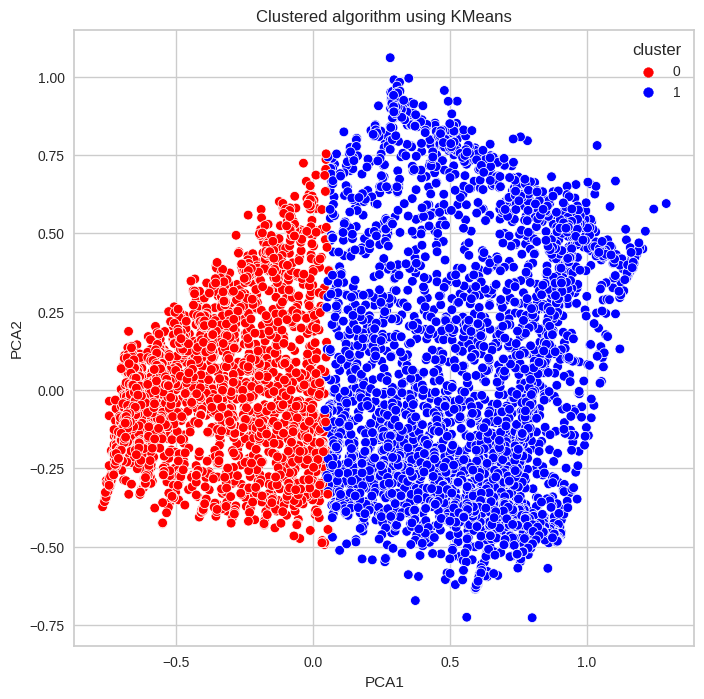

In [28]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=new_df_kmeans, palette=['red', 'blue'])
plt.title('Clustered algorithm using KMeans')

### 2. Mean Shift Clustering

Here, we will iteratively shift the data points towards the mode of their local density distribution untill coverage. We will cluster the dataset into high density regions reparated by low density regions

In [29]:
# Estimating the bandwitdh parameter
bandwidth = estimate_bandwidth(new_df, quantile=0.3, n_samples=300)

# Defining and fitting the model 
ms = MeanShift(bandwidth=bandwidth)
ms.fit(new_df)


# Getting the cluster labels and centroids 
labels = ms.labels_
centroids = ms.cluster_centers_

# Showing the number of clusters and their centroids 
n_clusters = len(np.unique(labels))
print(f'Number of clusters: {n_clusters}')
print("centroids")
print(centroids)


Number of clusters: 5
centroids
[[0.08969547 0.87057864 0.00760389 0.00655492 0.00471097 0.02545333
  0.21012094 0.09920411 0.11471438 0.11249394 0.03192005 0.01198228
  0.13502861 0.02696352 0.0196539  0.04500959 0.9556119 ]
 [0.70782913 1.         0.83708727 0.9966343  0.01894844 0.
  0.833333   0.666667   0.416667   0.         0.         0.43854749
  0.56594324 0.71107445 0.36896513 0.083333   1.        ]
 [0.57265003 1.         0.00880779 0.00327517 0.01326356 1.
  0.583333   0.25       0.5        0.66666667 1.         0.05865922
  0.65275459 0.76986308 0.12505949 0.         1.        ]
 [0.33461831 1.         0.45069278 0.54222528 0.         0.41397177
  0.333333   0.333333   0.         0.44444467 0.28455285 0.11173184
  0.24874791 0.77801285 0.15683769 0.25       1.        ]
 [0.15648968 0.818182   0.54618383 0.65047858 0.01201333 0.
  0.583333   0.5        0.083333   0.         0.         0.09217877
  1.         0.5920374  0.27482106 0.75       1.        ]]


We get three clusters using this method. Note that the bandwidth parameter can have a significant impact on the clustering results, so it is often a good idea to try different values of the bandwidth and evaluate the clustering performance using metrics such as silhouette score or visual inspection. 

We now introduce a column with the cluster group

In [32]:
X = pd.DataFrame.copy(new_df)
X['cluster_group'] = np.nan
for i in range(len(X)):
    X['cluster_group'].iloc[i] = labels[i]
print(X.cluster_group.sum())
X

851.0


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.087521           0.636364   0.030567          0.036775   
4     0.042940           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8941  0.001496           1.000000   0.005936          0.000000   
8942  0.001007           1.000000   0.006118          0.000000   
8943  0.001229           0.833333   0.002945          0.000000   
8944  0.000707           0.833333   0.000000          0.000000   
8945  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.004366             0.083333   
4                   0.000000      0.000000             0.083333   
...                      ...           ...                  ...   
8941                0.012939      0.000000             1.000000   
8942                0.013333      0.000000             1.000000   
8943                0.006418      0.000000             0.833333   
8944                0.000000      0.000776             0.000000   
8945                0.000000      0.002695             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8941                    0.000000                          0.833333   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.666667   
8944                    0.000000                          0.000000   
8945                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000           0.00000       0.005587      0.031720   
1                   0.166667           0.03252       0.000000      0.232053   
2                   0.000000           0.00000       0.033520      0.248748   
3                   0.055555           0.00813       0.002793      0.248748   
4                   0.000000           0.00000       0.002793      0.038397   
...                      ...               ...            ...           ...   
8941                0.000000           0.00000       0.016760      0.031720   
8942                0.000000           0.00000       0.016760      0.031720   
8943                0.000000           0.00000       0.013966      0.031720   
8944                0.111111           0.01626       0.000000      0.015025   
8945                0.222222           0.01626       0.064246      0.038397   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_group  
0     0.003979          0.003234          0.000000     1.0            0.0  
1     0.080893          0.024861          0.222222     1.0            0.0  
2     0.012264          0.014543          0.000000     1.0            0.0  
3     0.000000          0.020036          0.000000     1.0            0.0  
4     0.013374          0.005675          0.000000     1.0            0.0  
...        ...               ...               ...     ...            ...  
8941  0.006419          0.001133          0.500000     0.0            0.0  
8942  0.005